# [Python: Pandas](https://ru.hexlet.io/courses/python-pandas)

## [Испытания](https://ru.hexlet.io/courses/python-pandas#challenges)

### [Премии](https://ru.hexlet.io/challenges/python-pandas-bonuses-exercise)

https://ru.hexlet.io/code_reviews/1587868

In [10]:
import pandas as pd

In [327]:
def prepare_df(departments_path, employees_path, performance_path):
    df_departments = pd.read_csv(departments_path)
    df_employees = pd.read_csv(employees_path)
    df_performance = pd.read_csv(performance_path)
    return pd.merge(
            pd.merge(
                df_departments,
                df_performance,
                on='EmployeeID'),
            df_employees,
            on='EmployeeID'
        )


def get_department_performance(df):
    return df.groupby('Department').agg({'Performance': ['median']})

def calculate_bonuses(df):
    df['Bonus'] = df.apply(lambda x: get_bonuse(x['Performance'], x['Salary']), axis=1)
    df = df[df['Bonus'] > 0].sort_values(by='Bonus', ascending=False)
    return df[['FirstName', 'LastName', 'Email', 'Department', 'Bonus']].reset_index(drop=True)


def get_bonuse(performance, salary):
    if performance > 90:
        return 0.15 * salary
    if performance > 75:
        return 0.10 * salary
    if performance > 50:
        return 0.05 * salary
    return 0

In [106]:
df_departments = pd.read_csv('./data/departments.csv')
df_employees = pd.read_csv('./data/employees.csv')
df_performance = pd.read_csv('./data/performance.csv')

In [290]:
merged_df = prepare_df('./data/departments.csv', './data/employees.csv', './data/performance.csv')
merged_df.head()

,EmployeeID,Department,Salary,Performance,FirstName,LastName,Email
0,1,Marketing,86223,36,Michael,Johnson,michael.johnson@example.com
1,2,Finance,111570,48,Sophia,Brown,sophia.brown@example.com
2,3,Sales,56521,25,Liam,Williams,liam.williams@example.com
3,4,Sales,106894,67,Emma,Williams,emma.williams@example.com
4,5,Sales,64254,35,Sophia,Garcia,sophia.garcia@example.com


In [292]:
department_performance = get_department_performance(merged_df)
department_performance

,Performance
,median
Department,
Finance,58.0
HR,68.0
IT,59.5
Marketing,39.0
Sales,65.5


In [324]:
bonuses = calculate_bonuses(merged_df)
bonuses.head()

,FirstName,LastName,Email,Department,Bonus
0,Sophia,Miller,sophia.miller@example.com,Marketing,16932.75
1,Robert,Jones,robert.jones@example.com,HR,16440.15
2,David,Brown,david.brown@example.com,IT,16105.20
3,Liam,Martinez,liam.martinez@example.com,Sales,15953.40
4,Olivia,Johnson,olivia.johnson@example.com,Sales,15640.20


### [Скользящее среднее](https://ru.hexlet.io/challenges/python-pandas-rolling-exercise)

https://ru.hexlet.io/code_reviews/1588087

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [412]:
path = './data/sales.csv'

In [495]:
def analyze(path):
    df = pd.read_csv(path)
    df.columns = df.columns.str.lower()  # Преобразуем колонки в lowercase
    df = df.assign(
        profit_ratio=lambda x: (x['profit'] / x['sales']) * 100,
        rolling_avg=lambda x: x['profit_ratio'].rolling(3).mean().round(2)
    )
    return df


def visualize(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['month'], df['profit_ratio'], marker='o', color='blue', label='profit ratio')
    plt.plot(df['month'], df['rolling_avg'], marker='o', color='green', label='rolling average')
    plt.title("Monthly profit ratio and rolling average")
    plt.ylabel("Profit ratio")
    plt.legend()
    plt.grid(True)
    plt.show()


In [472]:
df = analyze(path)
df.head()

,month,sales,profit,profit_ratio,rolling_avg
0,2021-01-31,502,100.40,20.0,NaN
1,2021-02-28,718,201.04,28.0,NaN
2,2021-03-31,722,115.52,16.0,21.33
3,2021-04-30,627,131.67,21.0,21.67
4,2021-05-31,553,154.84,28.0,21.67


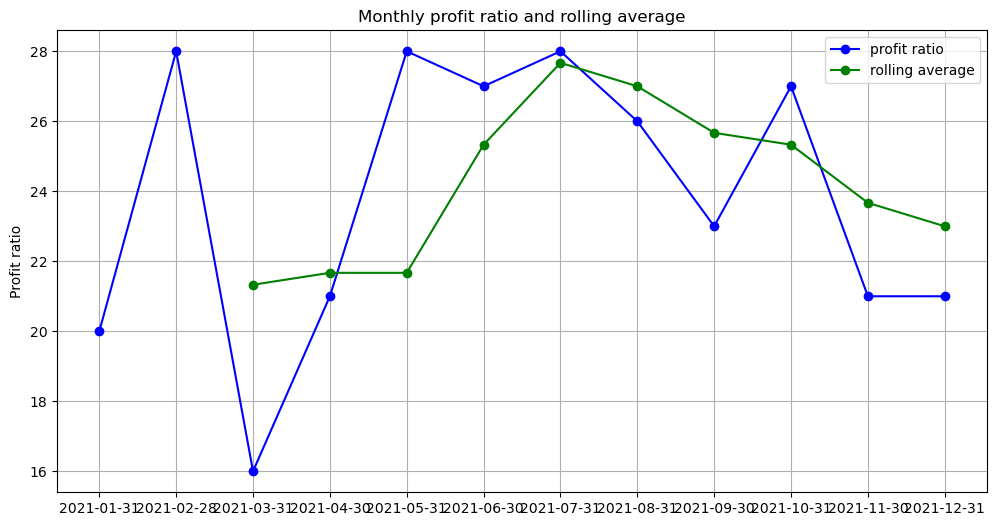

In [497]:
visualize(df)

### [Когортный анализ](https://ru.hexlet.io/challenges/python-pandas-cohorts-exercise)

In [504]:
path = './data/visits.csv'

In [617]:
def calculate_retention(path):
    df = pd.read_csv(path)
    df['FirstVisitDate'] = pd.to_datetime(df['FirstVisitDate'], errors='coerce').dt.to_period('M')
    df['FollowUpVisitDate'] = pd.to_datetime(df['FollowUpVisitDate'], errors='coerce').dt.to_period('M')
    df['value'] = df['FollowUpVisitDate'].apply(lambda e: 0 if pd.isna(e) else 1)
    return df

In [619]:
df = calculate_retention(path)
df.head(10)

,UserID,FirstVisitDate,FollowUpVisitDate,value
0,1,2021-02,2021-02,1
1,1,2021-02,2021-03,1
2,1,2021-02,2021-04,1
3,2,2021-03,2021-03,1
4,2,2021-03,2021-04,1
5,3,2021-01,2021-01,1
6,4,2021-06,2021-06,1
7,5,2021-05,NaT,0
8,6,2021-03,2021-03,1
9,6,2021-03,2021-04,1


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   UserID             180 non-null    int64    
 1   FirstVisitDate     180 non-null    period[M]
 2   FollowUpVisitDate  153 non-null    period[M]
dtypes: int64(1), period[M](2)
memory usage: 4.3 KB


In [597]:
data = {
    'City': ['London', 'Paris', 'London', 'Paris', 'London', 'Paris'],
    'Year': [2020, 2020, 2021, 2021, 2022, 2022],
    'Sales': [100, 150, 200, 180, 250, 220]
}

df = pd.DataFrame(data)

In [599]:
df

,City,Year,Sales
0,London,2020,100
1,Paris,2020,150
2,London,2021,200
3,Paris,2021,180
4,London,2022,250
5,Paris,2022,220


In [601]:
# values='Sales': указываем столбец, данные которого хотим агрегировать.
# index='City': строки будут соответствовать значениям столбца City.
# columns='Year': значения столбца Year будут заголовками столбцов.
# aggfunc='sum': функция суммирования данных.
pivot = pd.pivot_table(df, values='Sales', index='City', columns='Year', aggfunc='sum')
pivot

Year,2020,2021,2022
City,,,
London,100,200,250
Paris,150,180,220


In [623]:
pivot = pd.pivot_table(df, values='value', index='FirstVisitDate', columns='FollowUpVisitMonth', aggfunc='sum')

KeyError: 'FollowUpVisitMonth'